# Plan d'expériences de désactivation des enzymes
Valentine a réalisé un plan d'expériences. (Une série de conditions) et a enregistré les réponses (résultats de dosages))

L'enjeu de la manip est :
1. Modeliser (Trouver une équation que relie les différents paramètres étudiés et les résultats obtenus pour chaque réponse)
2. Evaluer la qualité des modèles
2. Trouver les paramètres pour lesquels on desactive les enzymes c'est-à-dire minimiser la valeur des réponses

# 0. Préliminaire

Dans un terminal (Ctrl+Maj+ù), taper:

    pip install lestpy --upgrade

Verifier que la version est bien la 0.0.8 (si j'ai le temps d'exporter mes correctifs sinon 0.0.7 mais l'analyse de sensitilité de fonctionnera pas), sinon relancer ce script

ou si ce n'est pas installé (il faut egalement avoir installé numpy, pandas, statsmodels, scipy, SALib et sklearn)

    pip install lestpy

# 1. Import des modules

+ Modules Pandas pour la gestion des tableaux
+ Modules Lestpy pour la modélisation

In [1]:
import pandas as pd
import lestpy.lbm_model as lp

# 2. Import des données

### Obtenir le chemin d'accès au fichier de données:
Enregistrer les données à l'endroit souhaité.

Faire clique-droit sur le fichier et cliquer sur: 

    copier en tant que chemin d'accès
    

### Définition du chemin et nom du fichier de données

<!> au sens des slashs pour le chemin ! Windows met les anti-slashs \\ qu'il faut corriger en /S

In [2]:
path, fichier = "C:/Users/TTfr/Documents/Python/Analyses DOE - MD/desactivation/","resultats DOE Val apfree.xlsx"

### Import des données dans python avec pandas
import et visualisation des 5 premieres lignes avec .head(5)

In [3]:
donnees = pd.read_excel(path + fichier, decimal=',')
donnees.head(5)

Unnamed: 0   pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]  \
0           0  3.0                 50           15                        5   
1           1  9.0                 50           15                        5   
2           2  3.0                 80           15                        5   
3           3  3.0                 65            5                        5   
4           4  3.0                 65           25                        5   

    C3 1570  C3 0614/2  
0  0.541167   0.722133  
1  0.661000   0.430000  
2  0.551333   0.681500  
3  0.379983   0.520817  
4  0.301867   0.930700

### Nettoyage des données et des colonnes obsolètes
la première colonne est inutile donc on la laisse tomber (.drop() ) défitinivement (inplace = True)

Et on visualise les 5 dernières lignes ( .tail(5) )

In [4]:
donnees.drop(columns = donnees.columns[0], inplace=True)
donnees.tail(5)

pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]   C3 1570  \
22  6.0                 65           15                        0  0.035433   
23  9.0                 50            5                        0  0.014333   
24  9.0                 80           25                        0  0.003200   
25  4.8                 50            5                        0  0.657367   
26  4.8                 80            5                        0  0.735100   

    C3 0614/2  
22   0.554067  
23   0.036267  
24   0.013900  
25   0.891667  
26   0.355967

### Liste des colonnes pour séparer entre X et y

In [5]:
donnees.columns

Index(['pH', 'Temperatures (°C)', 'Temps (min)', '[Acide pectique (%m/m)]',
       'C3 1570', 'C3 0614/2'],
      dtype='object')

### Définition des paramètres descriptifs X et des réponses y

et visualisation d'un descriptif de chaque tableau avec .describe()

In [6]:
y = donnees[['C3 1570',  'C3 0614/2']]
X = donnees[['pH', 'Temperatures (°C)', 'Temps (min)', '[Acide pectique (%m/m)]']]
X.describe()

pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]
count  27.00000          27.000000    27.000000                27.000000
mean    5.80000          63.888889    15.000000                 3.888889
std     1.96899          10.127394     6.793662                 3.755338
min     3.00000          50.000000     5.000000                 0.000000
25%     4.80000          57.500000    15.000000                 0.000000
50%     6.00000          65.000000    15.000000                 5.000000
75%     6.00000          65.000000    15.000000                 5.000000
max     9.00000          80.000000    25.000000                10.000000

In [7]:
y.describe()

C3 1570  C3 0614/2
count  27.000000  27.000000
mean    0.304333   0.586670
std     0.285070   0.306206
min     0.003033   0.002367
25%     0.024942   0.419325
50%     0.294000   0.578400
75%     0.553550   0.729033
max     0.891900   1.342567

# 3. Modelisation

### création d'un modèle par l'approche Lestpy 

In [8]:
model = lp.LBM_Regression()

### Premier essai - Modelisation linéaire
reponse = coef1 * pH + coef2 * T°C + coef3 * temps, etc.

Les valeurs *R-squared* pour chaque modèle sont faibles (maximum à 50%) montrant que les facteurs simples ne sont pas suffisants pour expliquer les variations des réponses.

Ce résultat est plutot conforme aux attentes. En effet, les enzymes ont un pH optimal et une temperature optimale, l'activité n'augmente donc pas avec l'augmentation de la température ou du pH par exemple. 

In [9]:
model.fit(X,y)

summary of the model for C3 1570:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4.764
Date:                Tue, 07 Jun 2022   Prob (F-statistic):             0.0387
Time:                        21:31:08   Log-Likelihood:                -1.5614
No. Observations:                  27   AIC:                             7.123
Df Residuals:                      25   BIC:                             9.715
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pH            -0.0

### Calcul de nouvelles variables 'interactions'
on calcule ces interactions en appelant la méthode .transform(X,y)


In [10]:
model.transform(X, y, interaction_list= 'ridgeless', allow_autointeraction=False)

method = variable instant
calculated in 0.204 seconds


La liste affichée *['X_xor_Y', 'X_or_Y'...]* correspond aux interactions utilisées.


Le tableau est maintenant composé des facteurs simples mais aussi d'interactions entre ceux-ci

### Second essai - modélisation avec interactions
Les valeurs *R-squared* sont maintenant bien meilleures. A une exception près (modele 'C3 1570') les valeurs sont supérieures à 85% 

In [11]:
model.fit()

summary of the model for C3 1570:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     7.990
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           0.000145
Time:                        21:31:08   Log-Likelihood:                 14.607
No. Observations:                  27   AIC:                            -13.21
Df Residuals:                      19   BIC:                            -2.847
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

#### On peut afficher l'expression exactes des différents modèles avec la methode .print_model()

In [12]:
model.print_model()

model for target "C3 1570"
The value of C3 1570 is high if:
   Coefficient                                          Parameter  Std Error
0       -0.501                 pH and not [Acide pectique (%m/m)]      0.219
1       -1.054  Neither Temperatures (°C) nor [Acide pectique ...      0.222
2        0.273  both Temps (min) and [Acide pectique (%m/m)] a...      0.182
3        0.513                  Temperatures (°C) xor Temps (min)      0.198
4       -0.453      Temperatures (°C) xor [Acide pectique (%m/m)]      0.187
5        0.354  both Temperatures (°C) and [Acide pectique (%m...      0.230
6       -0.304                              pH if not Temps (min)      0.204



model for target "C3 0614/2"
The value of C3 0614/2 is high if:
   Coefficient                                          Parameter  Std Error
0       -1.431                 pH and not [Acide pectique (%m/m)]      0.153
1        0.549                                  pH or Temps (min)      0.121
2        0.681       Tempe

#### On peut avoir un résumé des scores d'ajustement des différents modèles avec la methode .fitting_score()

In [13]:
for i in y:
    model.fitting_score(y[i])

Fitting score for target "C3 1570"
                R²  adj-R²  calc-Q²
model score  0.746   0.652    0.458
Fitting score for target "C3 0614/2"
                R²  adj-R²  calc-Q²
model score  0.924   0.884    0.805


# 4. Visualisation des différentes modélisations

On visualisera différents élements en créant une instance de la classe Display() et en passant notre modèle en paramètre

In [14]:
graf = lp.Display(model)

## 4.1 Une première méthode consiste à imprimer un descriptif des modèles.
Le descriptif comprend:
1. les scores d'ajustement
2. le graph d'ajustement (y modélisé en fonction de y mesuré)
3. la distribution des résidus
4. Le graphique d'optimisation du R2 de prédiction = Q2 en fonction du nombre de facteurs dans le modèle (l'idée etant de maximiser le Q2 et minimiser le nombre de facteurs)

Fitting score for target "C3 1570"
                R²  adj-R²  calc-Q²
model score  0.746   0.652    0.458


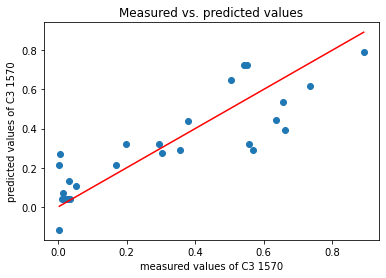

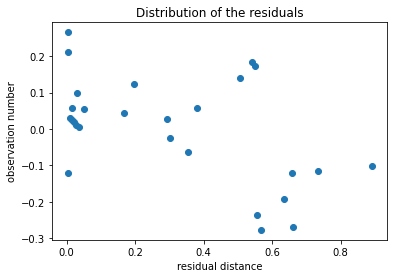

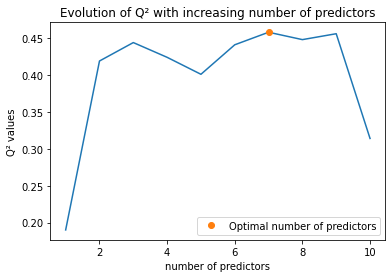

Fitting score for target "C3 0614/2"
                R²  adj-R²  calc-Q²
model score  0.924   0.884    0.805


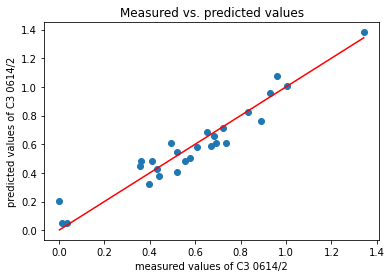

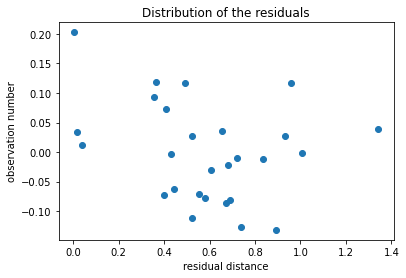

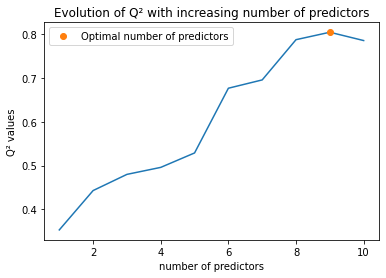

In [15]:
graf.describe()

## 4.2 Domaine experimental
On décrit d'abord le domaine expérimental (= le cadre) dans lequel aura lieu l'optimisation (quelle gamme de pH, de temp, etc.)
On a accès à une méthode automatisée .feature_analysis() qui renvoie le domaine expérimental analysée, le mélange (mix) si il y a un mélange

domain est un dictionnaire dont les clés sont les facteurs et les valeurs sont une liste comprenant :
+ [statut (inutile à ce stage), minimum, maximum, [valeurs si variable], type de variable (discrète ou continue)]

In [16]:
domain, mix = model.features_analysis(X)

## 4.3 Analyse de sensibilité
L'objectif est de voir à quel point les variation des variables seules ou en interactions sont impactantes sur la valeur finale du modèle

Sensitivity analysis for response C3 1570


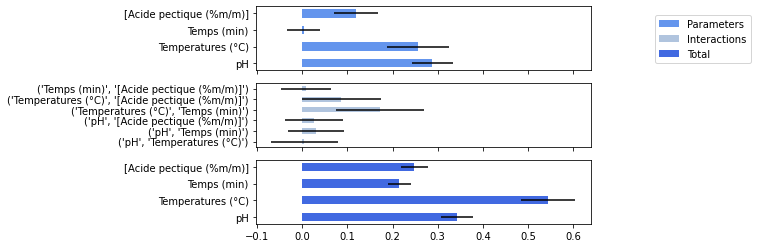

Sensitivity analysis for response C3 0614/2


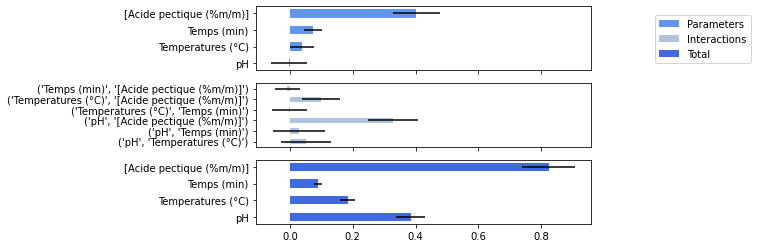

In [17]:
graf.sensibility_analysis(domain)

## 5. Optimisation

L'objectif de cette manip est de trouver les conditions idéales selon le modèle pour minimiser l'activité des enzymes donc maximiser la desactivation

In [18]:
domain, mix = model.features_analysis(X)
print(domain)

{'pH': [None, 3.0, 9.0, [3.0, 9.0, 6.0, 4.8], 'discrete'], 'Temperatures (°C)': [None, 50, 80, [50, 80, 65], 'discrete'], 'Temps (min)': [None, 5, 25, [15, 5, 25], 'discrete'], '[Acide pectique (%m/m)]': [None, 0, 10, [5, 0, 10], 'discrete']}


## 5.2 Definition des objectifs
Les objectifs sont une liste qui décrit pour chaque variable dans l'ordre l'objectif d'optimisation que l'on souhaite parmi:
minimisation, maximisation, valeur à atteindre ou aucun objectif

Ici on souhaite minimiser toutes les réponses donc on crée une liste de 8 'minimize' car il y a 8 modèles

In [19]:
target = ['minimize'] * 8
print(target)

['minimize', 'minimize', 'minimize', 'minimize', 'minimize', 'minimize', 'minimize', 'minimize']


## 5.3 Minimisation globale
On lance l'optimisation avec la méthode .optimize() dans laquelle on injecte le domaine experimental et les objectifs.

In [20]:
model.optimize(domain, target)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            9.000        9.000
Temperatures (°C)                            65.000       65.000
Temps (min)                                   5.000        5.000
[Acide pectique (%m/m)]                       0.000        0.000
PredC3 1570                                  -0.293       -0.293
PredC3 0614/2                                -0.231       -0.231
desirability                                  1.000        1.000


pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]  \
0     6.0                 65           25                        0   
1     6.0                 65           15                       10   
2     3.0                 80            5                        5   
3     3.0                 65            5                        0   
4     6.0                 80            5                        0   
...   ...                ...          ...                      ...   
9995  3.0                 50            5                       10   
9996  3.0                 65           15                        5   
9997  4.8                 50           25                       10   
9998  3.0                 65            5                        0   
9999  9.0                 65            5                       10   

      PredC3 1570  PredC3 0614/2  desirability  
0        0.039711       0.584575      0.664582  
1        0.211310       0.972939      0.490844  
2        0.892508       0.455021      0.347730  
3        0.372311       0.373649      0.609853  
4        0.486309       0.398462      0.559106  
...           ...            ...           ...  
9995     0.386377       0.231012      0.636751  
9996     0.486314       0.753185      0.474987  
9997     0.657908       0.848866      0.388997  
9998     0.372311       0.373649      0.609853  
9999     0.050310       1.003920      0.518643  

[10000 rows x 7 columns]

On obtient deux tableaux:
1. Le premier correspond aux résulats (la condition la meilleure pour atteindre **tous les objectifs en même temps**). La désirabilité montre le score obtenu sur **ces conditions pour toutes les réponses**
3. Le second est l'ensemble des essais menés pour obtenir ces résultats (obsolete)

## 5.4 Maximisation globale
On peut faire le meme exercice pour maximiser les valeurs et donc voir les conditions optimales pour **toutes les activités en même temps**

(en laissant les objectifs à None on maximise tout)

In [21]:
maximiser = ['maximize']*8
model.optimize(domain, maximiser)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            9.000        9.000
Temperatures (°C)                            80.000       80.000
Temps (min)                                   5.000        5.000
[Acide pectique (%m/m)]                      10.000       10.000
PredC3 1570                                   0.847        0.847
PredC3 0614/2                                 1.673        1.673
desirability                                  0.883        0.883


pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]  \
0     9.0                 65            5                        5   
1     6.0                 80           15                       10   
2     4.8                 80           15                        0   
3     9.0                 80            5                        5   
4     4.8                 65           15                        0   
...   ...                ...          ...                      ...   
9995  4.8                 80            5                       10   
9996  6.0                 50            5                        5   
9997  6.0                 65           15                       10   
9998  9.0                 65            5                        0   
9999  3.0                 80           15                        5   

      PredC3 1570  PredC3 0614/2  desirability  
0       -0.055653       0.688635      0.279956  
1        0.791462       1.381120      0.792504  
2        0.370883       0.592658      0.443167  
3        0.398908       0.816437      0.510214  
4        0.140551       0.594751      0.358570  
...           ...            ...           ...  
9995     1.072128       1.032492      0.787161  
9996     0.213176       0.205241      0.281573  
9997     0.211310       0.972939      0.466992  
9998    -0.292888      -0.230741      0.000000  
9999     0.724608       0.659326      0.570468  

[10000 rows x 7 columns]

In [22]:
domain = {'pH': [None, 3, 9, [3,6,9], 'discrete'], 'Temperatures (°C)': [None, 50, 80, [50, 80, 65], 'discrete'], 'Temps (min)': [None, 5, 25, [15, 5, 25], 'discrete'], '[Acide pectique (%m/m)]': [None, 0, 10, [5, 0, 10], 'discrete']}

In [23]:
minC3 = [None]*8
minC3[1] = 'minimize'
minC3[5] = 'minimize'

In [24]:
minimization = {'C3 1570': 'min', 'C3 0614/2': 'min'}
model.optimize(domain, minimization)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            9.000        9.000
Temperatures (°C)                            65.000       65.000
Temps (min)                                   5.000        5.000
[Acide pectique (%m/m)]                       0.000        0.000
PredC3 1570                                  -0.293       -0.293
PredC3 0614/2                                -0.231       -0.231
desirability                                  1.000        1.000


pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]  \
0      6                 80           15                       10   
1      9                 50            5                        5   
2      9                 80            5                        5   
3      6                 50           25                        0   
4      3                 65           25                        0   
...   ..                ...          ...                      ...   
9995   6                 65           15                        5   
9996   9                 80           25                       10   
9997   6                 50            5                        0   
9998   3                 80           25                       10   
9999   6                 80            5                        5   

      PredC3 1570  PredC3 0614/2  desirability  
0        0.791462       1.381120      0.198999  
1       -0.033624       0.426448      0.733946  
2        0.398908       0.816437      0.486839  
3        0.836128       0.824428      0.318506  
4        0.211310       0.782259      0.553651  
...           ...            ...           ...  
9995     0.320014       0.609049      0.569694  
9996     0.575196       1.673230      0.000000  
9997     0.403597       0.620123      0.538093  
9998     0.575196       0.976279      0.385546  
9999     0.645708       0.373570      0.494228  

[10000 rows x 7 columns]

In [25]:
model.optimize(domain, minC3)

size = 10000
                         Mean of the 5 best results  Best result
pH                                            9.000        9.000
Temperatures (°C)                            65.000       65.000
Temps (min)                                  19.000       25.000
[Acide pectique (%m/m)]                       0.000        0.000
PredC3 1570                                  -0.180       -0.132
PredC3 0614/2                                -0.231       -0.231
desirability                                  1.000        1.000


pH  Temperatures (°C)  Temps (min)  [Acide pectique (%m/m)]  \
0      9                 65           15                        5   
1      9                 65           15                        5   
2      9                 80            5                       10   
3      6                 80           25                        5   
4      9                 65            5                       10   
...   ..                ...          ...                      ...   
9995   9                 65           25                        0   
9996   6                 80           15                        5   
9997   6                 50           25                        0   
9998   3                 80           15                        0   
9999   9                 65           15                       10   

      PredC3 1570  PredC3 0614/2  desirability  
0        0.153714       0.688635      0.719116  
1        0.153714       0.688635      0.719116  
2        0.846727       1.673230      0.000000  
3        0.213176       0.577875      0.758486  
4        0.050310       1.003920      0.592903  
...           ...            ...           ...  
9995    -0.131888      -0.230741      1.000000  
9996     0.558309       0.475722      0.793065  
9997     0.836128       0.824428      0.667687  
9998     0.522143       0.635613      0.738224  
9999     0.130810       1.003920      0.592903  

[10000 rows x 7 columns]

In [26]:
essais = pd.DataFrame([[9,80,5,0], [9,50,5,0], [9,50,25,0], [6,50,5,0]], columns=X.columns)
model.predict(essais)

PredC3 1570  PredC3 0614/2
0     0.153709       0.048579
1     0.070998       0.048579
2     0.664529       0.048579
3     0.403597       0.620123

# Modelisation quadratique

In [27]:
modq = lp.LBM_Regression()
modq.transform(X,y, interaction_list='quadratic', allow_autointeraction=True)

method = variable instant
calculated in 0.05 seconds


In [28]:
modq.fit()

summary of the model for C3 1570:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     6.991
Date:                Tue, 07 Jun 2022   Prob (F-statistic):            0.00165
Time:                        21:31:14   Log-Likelihood:                 4.8326
No. Observations:                  27   AIC:                            -1.665
Df Residuals:                      23   BIC:                             3.518
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [29]:
modq.print_model()


model for target "C3 1570"
The value of C3 1570 is high if:
   Coefficient                              Parameter  Std Error
0        0.677  Temperatures (°C) x Temperatures (°C)      0.217
1       -0.628                                     pH      0.217
2        0.458                [Acide pectique (%m/m)]      0.215



model for target "C3 0614/2"
The value of C3 0614/2 is high if:
   Coefficient                                    Parameter  Std Error
0        0.724                      [Acide pectique (%m/m)]      0.191
1        0.759                 pH x [Acide pectique (%m/m)]      0.184
2        0.587  Temperatures (°C) x [Acide pectique (%m/m)]      0.197
3        0.408                            Temperatures (°C)      0.195
4        0.414                                  Temps (min)      0.195
5       -0.222                                      pH x pH      0.185





In [30]:
lp.Interaction.get_interaction_list(family='ridgeless')

['X_and_Y',
 'X_xor_Y',
 'X_and_not_Y',
 'Neither_X_nor_Y_extreme',
 'both_X_Y_average',
 'X_if_not_Y',
 'X_or_not_Y',
 'X_or_Y',
 'Difference_X_Y',
 'X_like_Y',
 'X_if_Y',
 'Sum_X_Y']

c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1293: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1293: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1293: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1293: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1293: UserWarning: Matplotlib is currently using module://matplotlib_i

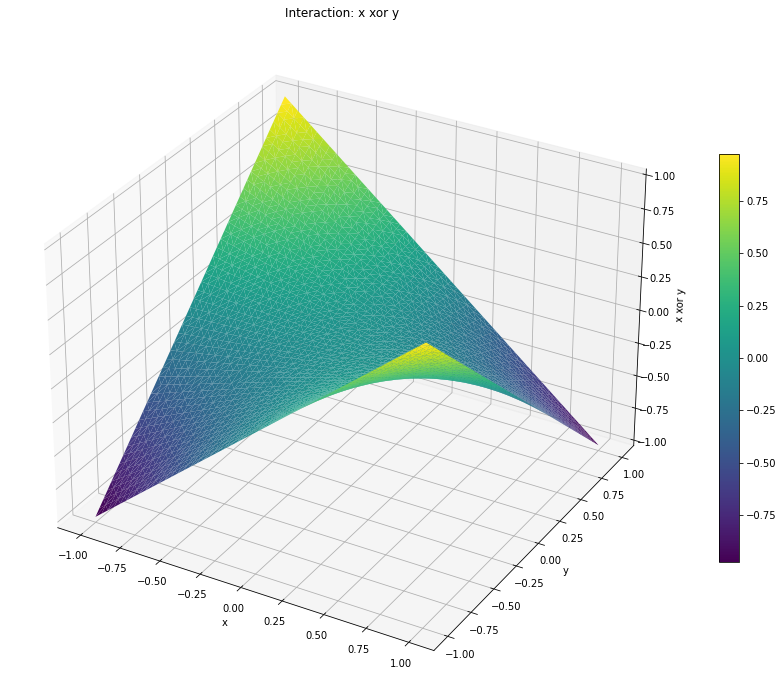

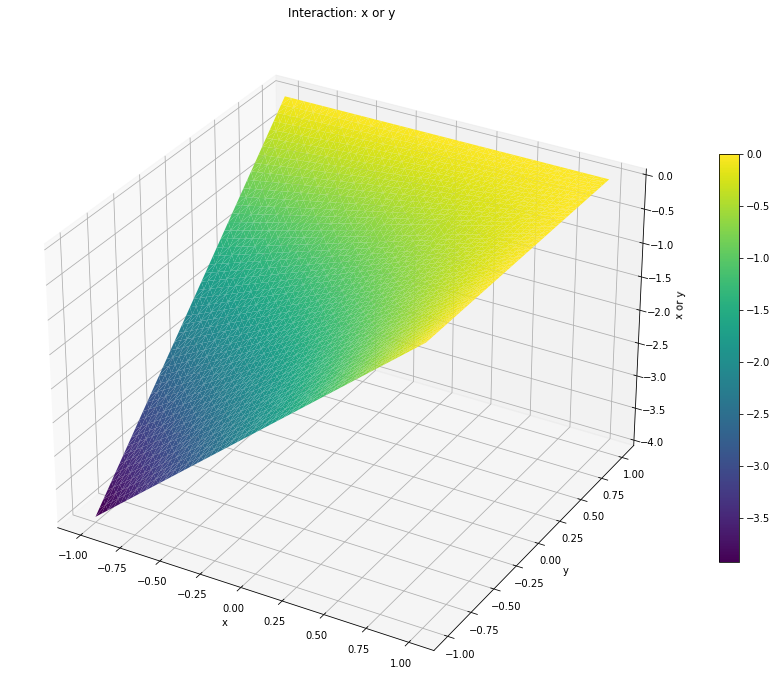

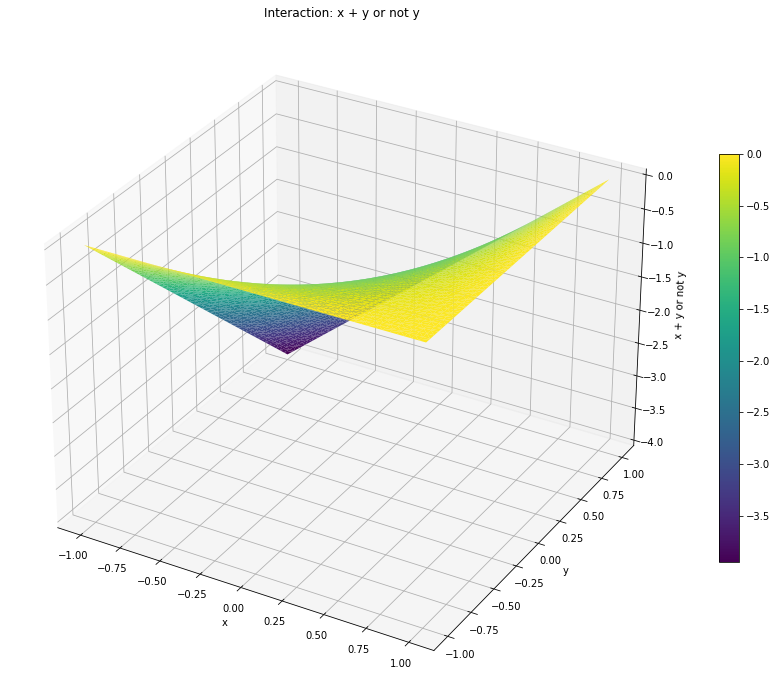

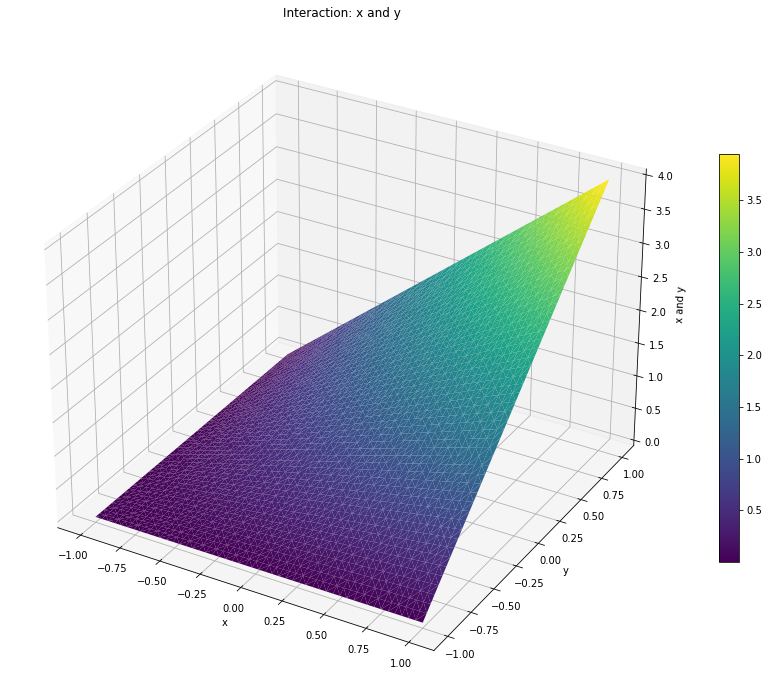

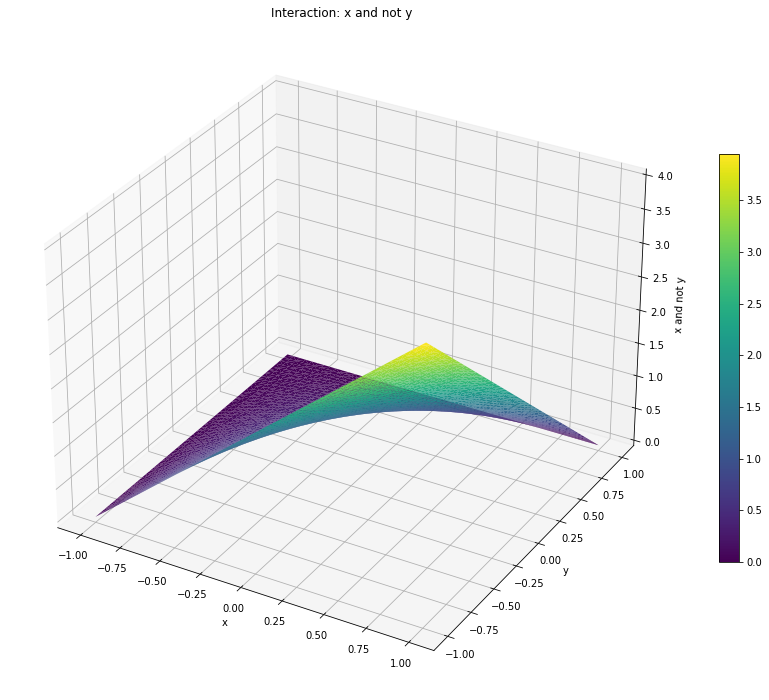

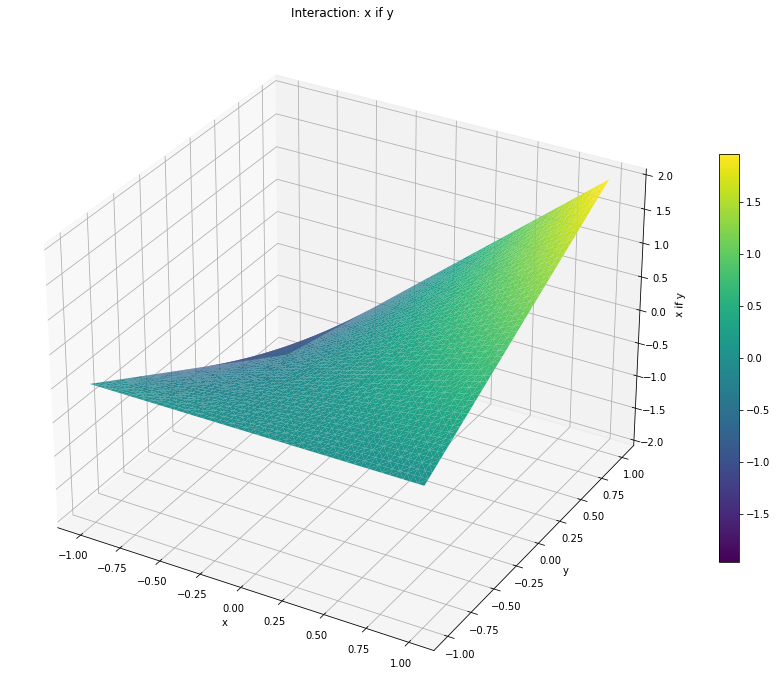

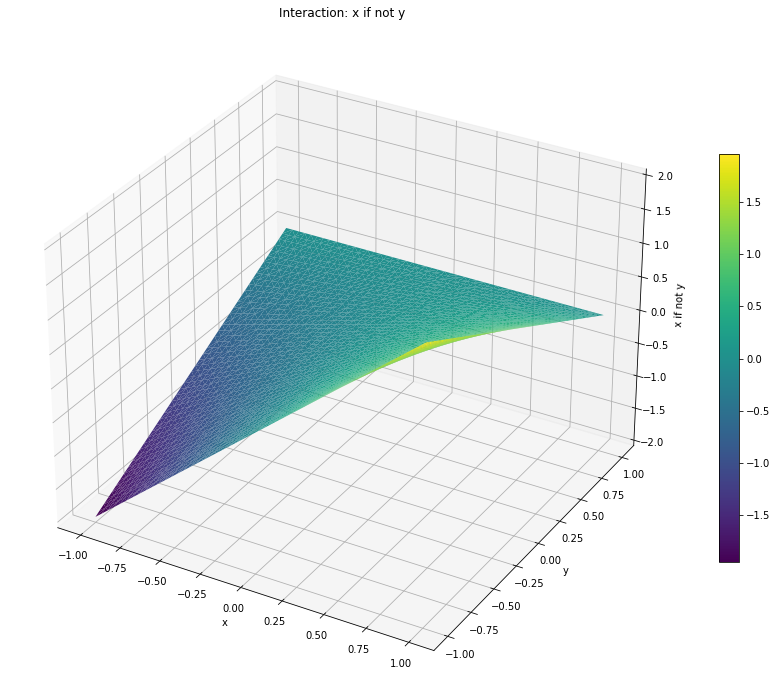

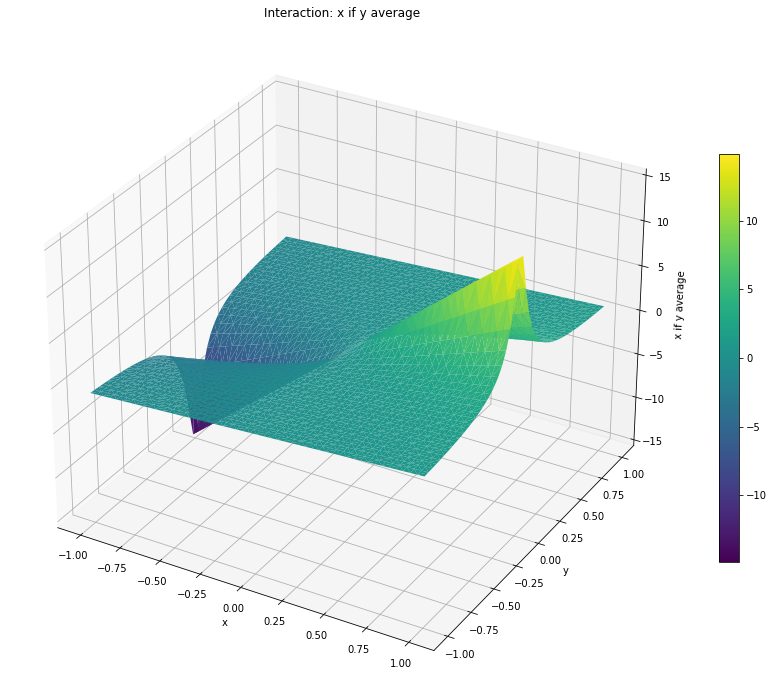

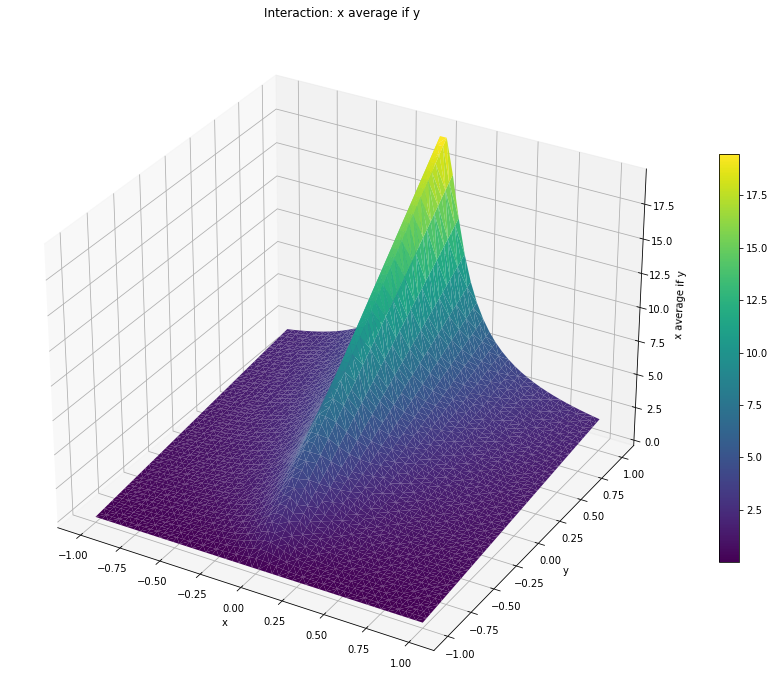

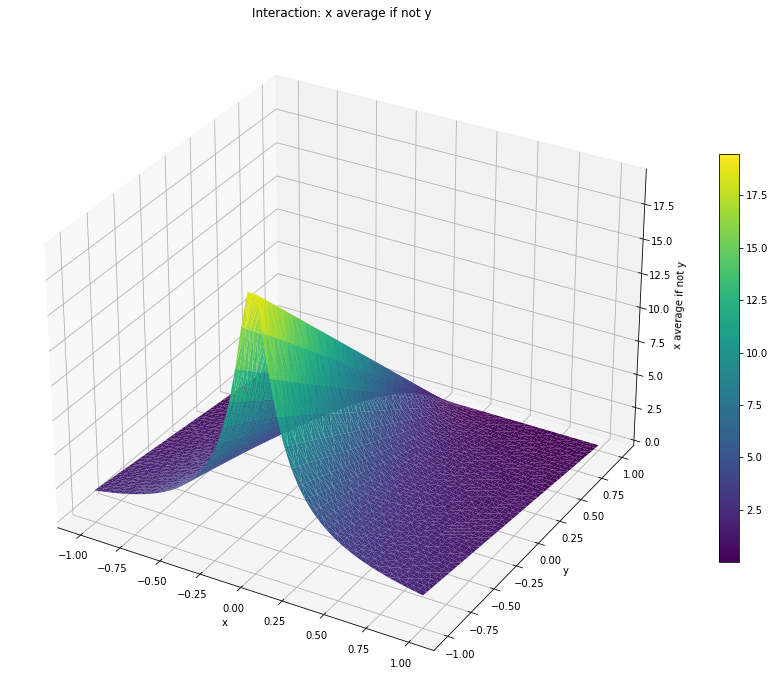

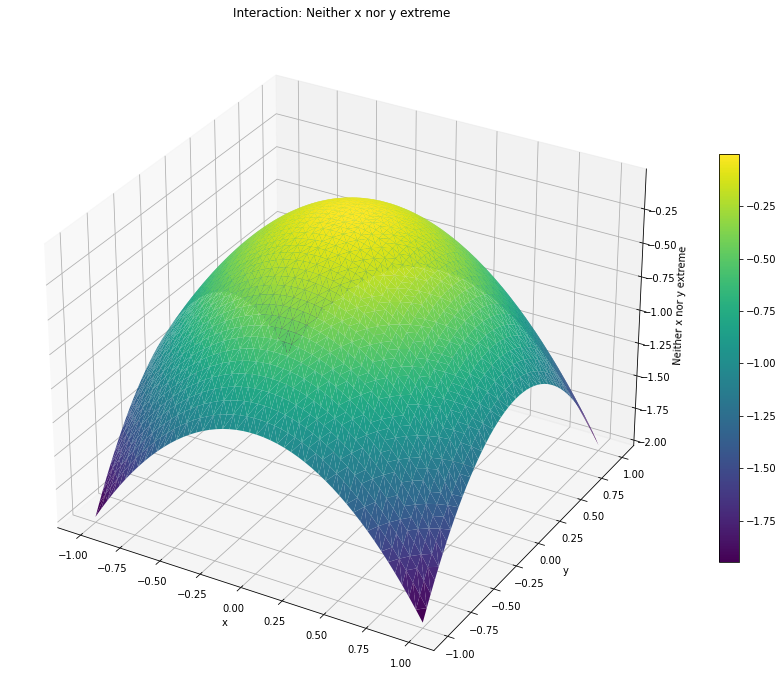

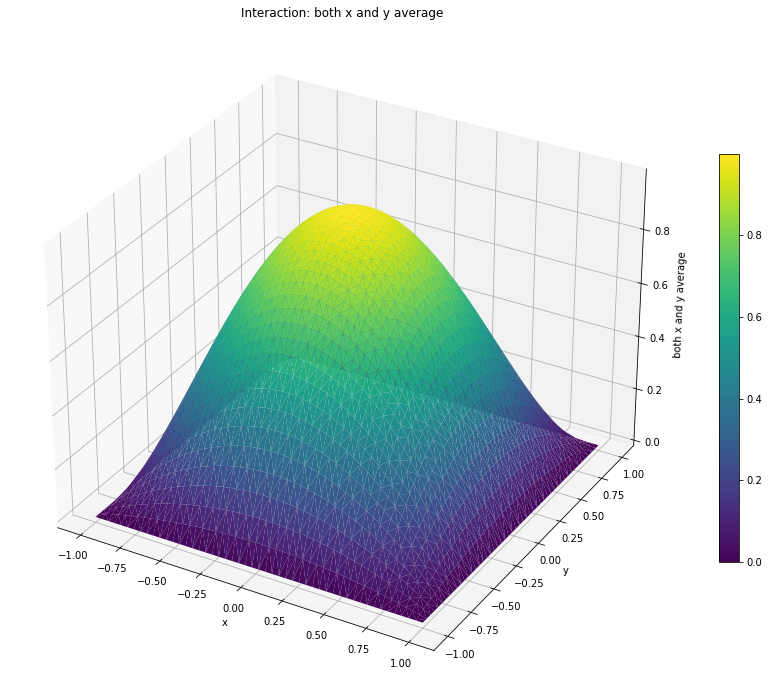

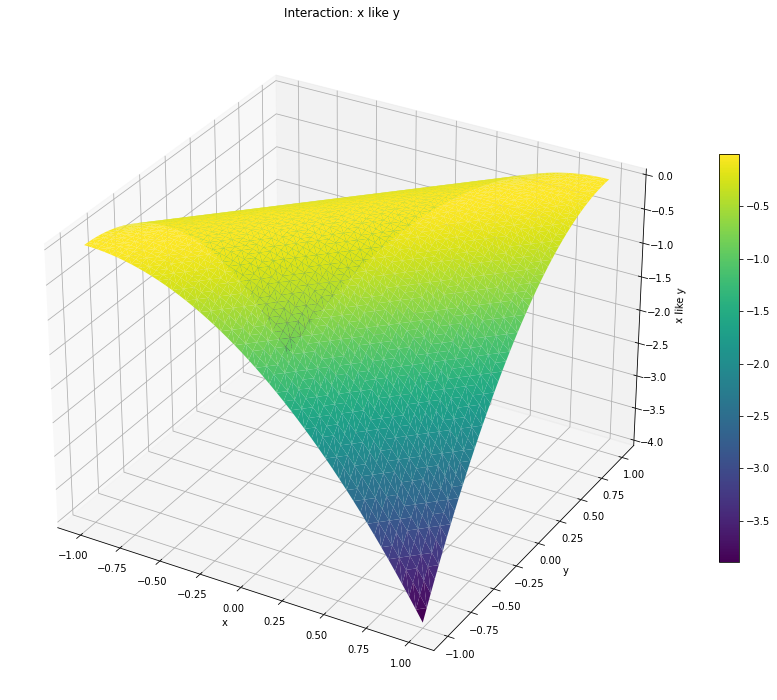

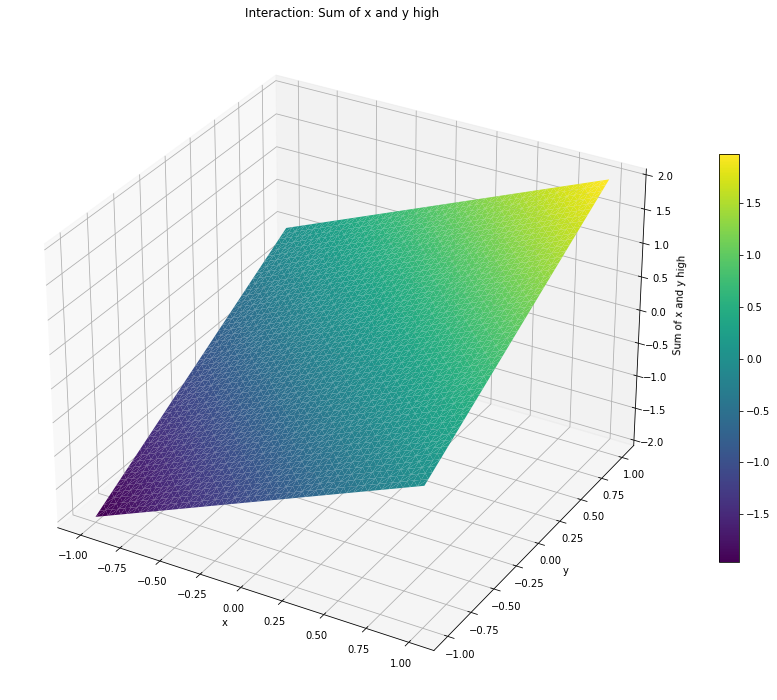

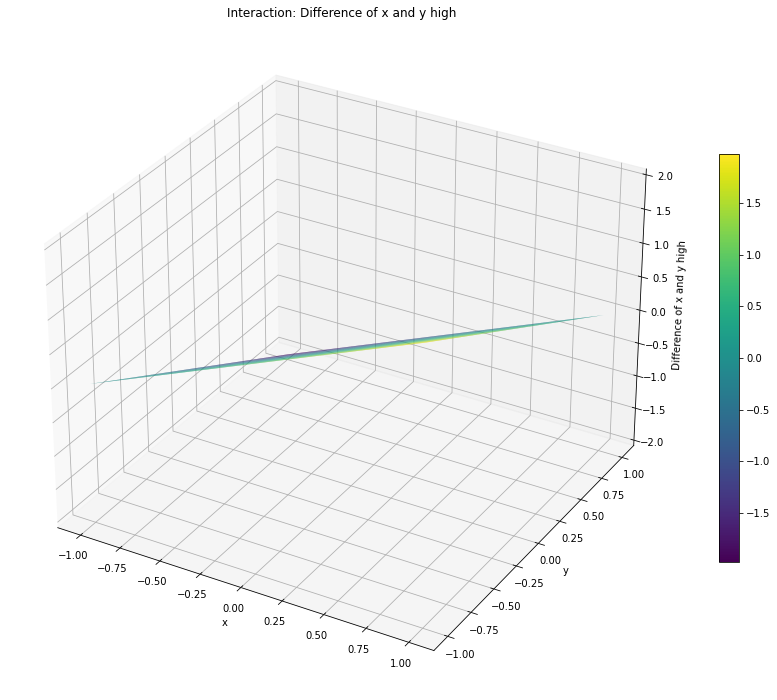

In [31]:
for n in lp.Interaction.interaction_list:
    graf.display_interaction(n)

In [32]:
X.columns

Index(['pH', 'Temperatures (°C)', 'Temps (min)', '[Acide pectique (%m/m)]'], dtype='object')

In [33]:
domain = {'pH': [6, 3, 9, [3,6,9], 'continuous'], 'Temperatures (°C)': ['toPlot', 50, 80, [50, 80, 65], 'continuous'], 'Temps (min)': ["toPlot", 5, 25, [15, 5, 25], 'continuous'], '[Acide pectique (%m/m)]': [0, 0, 10, [5, 0, 10], 'discrete']}

screened_var ['Temperatures (°C)', 'Temps (min)']
size = 150


c:\Users\TTfr\Documents\Python\lestpy\lestpy\lbm_model.py:1293: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


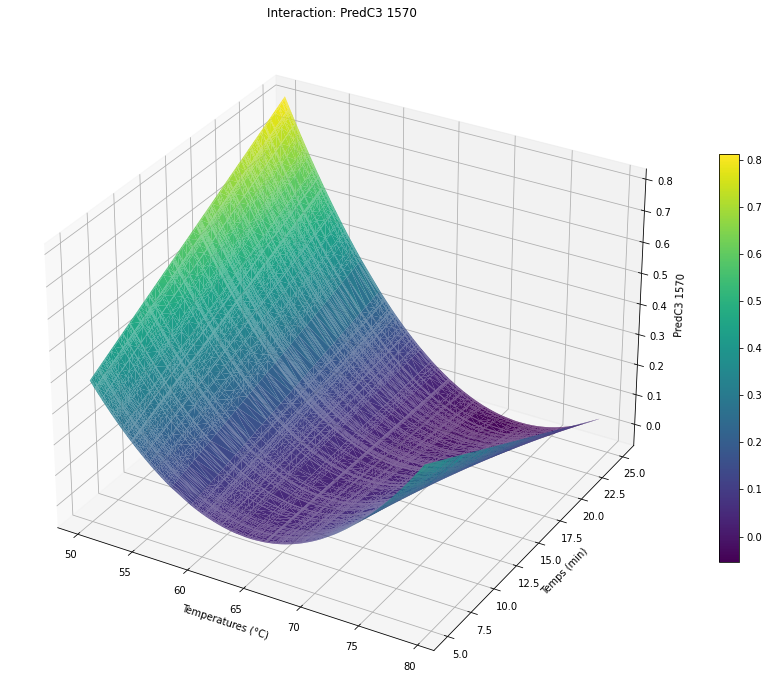

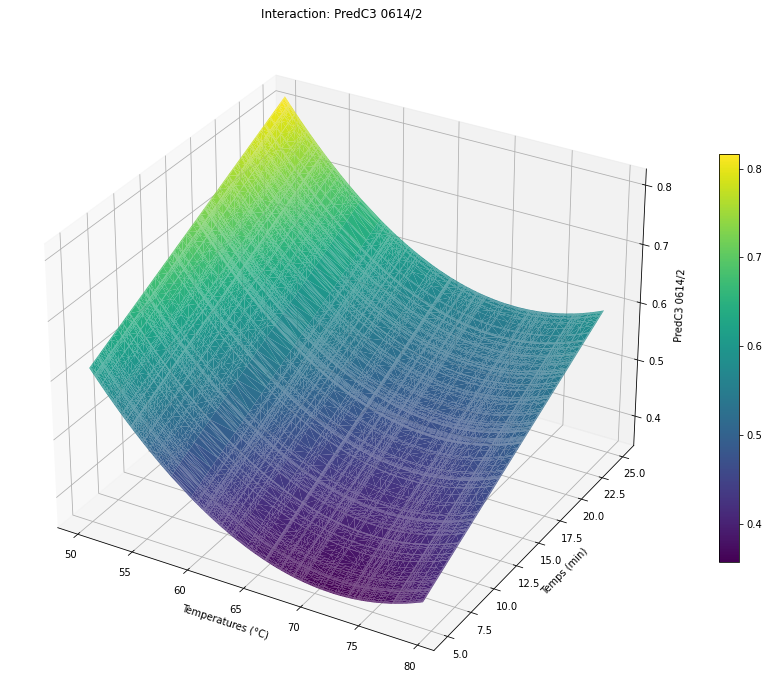

In [34]:
graph = lp.Display(model)
graph.response_surface(experimental_domain=domain, size=150)

In [35]:
oi = lp.Outliers_Inspection(model)

<!> in development <!>
threshold (4/n) = 0.148
potential outliers : [(1, 0.21274946660441704), (12, 0.19640598687718197), (24, 0.17163163807873583)]


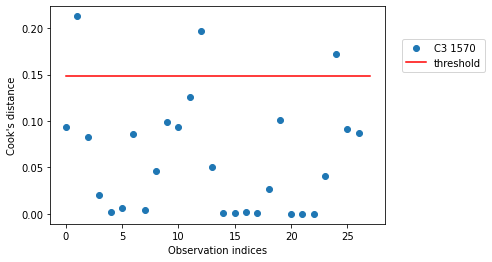

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      0.541      0.725      0.093     -1.309      0.303     -0.864     -1.336     -0.881
         1      0.661      0.392      0.213      1.933      0.313      1.305      2.099      1.417
         2      0.551      0.725      0.083     -1.236      0.303     -0.816     -1.255     -0.828
         3      0.380      0.438      0.020     -0.459      0.434     -0.402     -0.449     -0.393
         4      0.302      0.277      0.002      0.180      0.318      0.123      0.175      0.119
         5      0.051      0.105      0.007     -0.381      0.270     -0.232     -0.372     -0.226
         6      0.568      0.292      0.086      1.813      0.174      0.832      1.940      0.890
         7

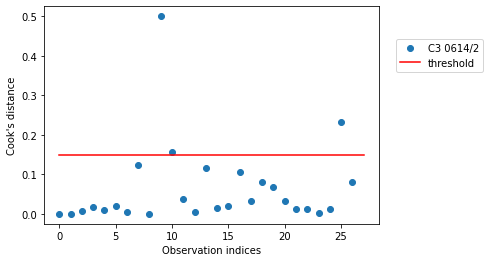

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      0.722      0.713      0.001      0.115      0.378      0.090      0.112      0.087
         1      0.430      0.426      0.000      0.038      0.181      0.018      0.037      0.017
         2      0.682      0.659      0.007      0.291      0.463      0.270      0.283      0.262
         3      0.521      0.549      0.017     -0.392      0.528     -0.415     -0.382     -0.405
         4      0.931      0.957      0.009     -0.344      0.441     -0.306     -0.335     -0.298
         5      0.653      0.689      0.020     -0.473      0.471     -0.446     -0.462     -0.436
         6      0.608      0.578      0.006      0.345      0.319      0.237      0.336      0.230
         7

In [36]:
oi.cooks_distance()